In [7]:
import math
import numpy as np
import pandas as pd
import statsmodels
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(
    'C:\\Users\\vidya\\OneDrive\\Desktop\\Python_coding_practice_Datasets\\PythonDataSets\\Logistic_Regression\\User_Data_purchase.csv')
print(df.shape)
print(df.columns)
X = df[df.columns[0:-1]]
print(X.head(5))
X.drop(['User ID'], axis=1, inplace=True)
y = np.array(df['Purchased']).reshape(-1, 1)
print(X.shape, y.shape)



(400, 5)
Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
    User ID  Gender  Age  EstimatedSalary
0  15624510    Male   19            19000
1  15810944    Male   35            20000
2  15668575  Female   26            43000
3  15603246  Female   27            57000
4  15804002    Male   19            76000
(400, 3) (400, 1)


C:\Users\vidya\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
print(X.head(5))

   Gender  Age  EstimatedSalary
0    Male   19            19000
1    Male   35            20000
2  Female   26            43000
3  Female   27            57000
4    Male   19            76000


In [9]:
LE = LabelEncoder()
X['Gender'] = LE.fit_transform(X['Gender'])

<ipython-input-9-26d624213f3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = LE.fit_transform(X['Gender'])


In [10]:
X['Gender'] 

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int32

In [31]:


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=23)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

logistic = sm.Logit(y_train, X_train)
model = logistic.fit()
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.356756
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 Mar 2021   Pseudo R-squ.:                  0.4540
Time:                        15:51:36   Log-Likelihood:                -107.03
converged:                       True   LL-Null:                       -196.03
Covariance Type:            nonrobust   LLR p-value:                 2.387e-38
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.1139      1.489     -8.133      0.000     -15.033      -9.195
Gender        

In [32]:
X_test

,const,Gender,Age,EstimatedSalary
133,1.0,0,21,68000
331,1.0,0,48,119000
167,1.0,0,35,71000
335,1.0,0,36,54000
239,1.0,0,53,143000
...,...,...,...,...
280,1.0,0,59,88000
392,1.0,0,45,45000
44,1.0,0,28,84000
221,1.0,1,35,91000


In [25]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [33]:

y_pred = model.predict(X_test)
print(y_pred)



133    0.006528
331    0.942398
167    0.141465
335    0.101144
239    0.991508
         ...   
280    0.984348
392    0.377171
44     0.052201
221    0.316697
363    0.509676
Length: 100, dtype: float64


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

In [28]:
fpr, tpr, th= roc_curve(y_test, y_pred )


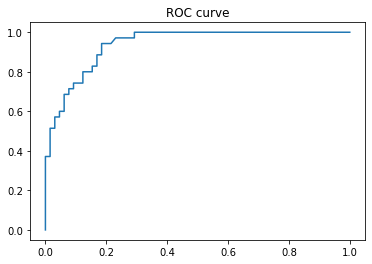

In [29]:
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.show()

In [30]:
roc_auc_score(y_test, y_pred)

0.9382417582417584

In [34]:
#Using round function as well, we can use below functionality

y_pred = y_pred.apply(lambda x: 1 if x >= 0.5 else 0)
print(y_pred)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_pred, y_test))

print()
print(accuracy_score(y_pred,  y_pred))


133    0
331    1
167    0
335    0
239    1
      ..
280    1
392    0
44     0
221    0
363    1
Length: 100, dtype: int64
[[60 11]
 [ 5 24]]

1.0


In [73]:
import pickle
with open(r"C:\Users\vidya\OneDrive\Desktop\Python_coding_practice_Datasets\PythonDataSets\Logistic_Regression\purchased.pkl", 'wb') as file:
    pickle.dump(model, file )


In [ ]:
with open(r"C:\Users\vidya\PycharmProjects\Library\ML_Model_Deployment\purchased.pkl", 'rb') as file:
    pickle.dump(model, file )

In [78]:
with open(r"C:\Users\vidya\OneDrive\Desktop\Python_coding_practice_Datasets\PythonDataSets\Logistic_Regression\purchased.pkl", 'rb') as file:

#with open(r"C:\Users\vidya\PycharmProjects\Library\ML_Model_Deployment\purchased.pkl", 'rb') as file:
    model = pickle.load(file)
    print(model)

In [79]:
model

In [81]:
model.predict(np.array([1223,1,27,137000]))

array([0.])

In [64]:
print(y_pred.shape)
y_pred

(100,)


133    0
331    1
167    0
335    0
239    1
      ..
280    1
392    0
44     0
221    0
363    1
Length: 100, dtype: int64

In [62]:
print(y_test.shape)
y_test

(100, 1)


array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    